In [1]:
import sys
import matplotlib.pyplot as plt
sys.path.append("/home/shannc/Bio_SDD/MUIC_senior_project/workflow/bin")
import null_distribution as nd
import polars as pl
import h5py
import concurrent.futures as futures
import numpy as np

%matplotlib inline

In [2]:
sem_file = "/home/shannc/Bio_SDD/MUIC_senior_project/workflow/results/C_indra/Analysis/sem_matrices.hdf5"
prottrans = "/home/shannc/Bio_SDD/MUIC_senior_project/workflow/results/C_indra/Analysis/Embeddings_prottrans/distances.hdf5"
outdir = "/home/shannc/Bio_SDD/MUIC_senior_project/workflow/.cache/"
file = h5py.File(sem_file)
pt = h5py.File(prottrans)

## Wang semantic similarity distribution

In [3]:
mf = nd.Dist(file, ontology="MF")
bp = nd.Dist(file, ontology="BP")
cc = nd.Dist(file, ontology="CC")
try:
    sem_distribution = np.loadtxt(f"{outdir}/sem_distribution")
except FileNotFoundError:
    value = 1_000_000
    with futures.ProcessPoolExecutor() as exec:
        result: list[futures.Future] = list(exec.map(nd.null_distribution, [cc, mf, bp], [value, value ,value]))
    sem_distribution = np.mean(result, axis=0)
    sem_distribution.tofile(f"{outdir}/sem_distribution", sep=" ")

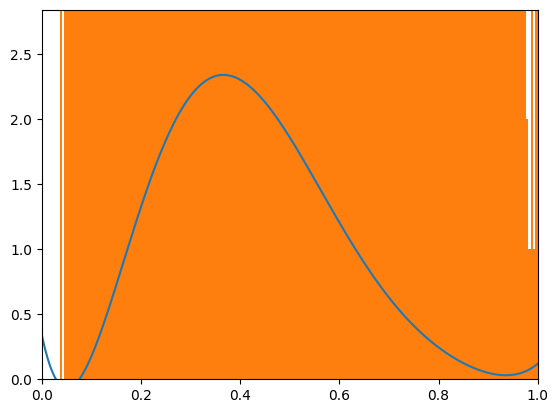

In [4]:
# ys, xs = np.histogram(sem_distribution, bins="auto", density=True)
SEM = nd.PdfEstimate(sem_distribution, 6, (0, 1))
SEM.plot(with_hist=True)

## Distribution for Prottrans

In [5]:
PT = nd.Dist(pt, metric="cosine")
try:
    pt_distribution = np.loadtxt(f"{outdir}/pt_distribution")
except FileNotFoundError:
    pt_distribution = nd.null_distribution(PT, value)
    pt_distribution.tofile(f"{outdir}/pt_distribution", sep=" ")

pt_pdf = nd.PdfEstimate(pt_distribution, 6, (0, 1))

### Apply to data 

In [6]:
group_file = "/home/shannc/Bio_SDD/MUIC_senior_project/workflow/results/C_indra/1-First_pass/C_indra_all_wcoverage.tsv"
data = pl.read_csv(group_file, separator="\t", null_values="NA")